In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, GRU, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
df= pd.read_csv('D:\year 3\Semester 2\Data Science\Sales-Customer-Behavior-Analysis\Preprocessing\Preprocessed dataset\Preprocessed Time Series Final.csv')

In [3]:
df.head()

,product_id,category_id,price,user_id,user_session,category_code_0,category_code_1,category_code_2,category_code_3,category_code_4,...,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,event_type
0,44600062,2103807459595387724,-0.710172,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,view
1,1004545,2053013555631882655,0.768298,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,view
2,29800030,2053013559842964121,-0.336330,555306597,3a374230-2ac7-429d-8fe0-92ad8fdc6b28,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,view
3,16800186,2053013558316237377,0.159003,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,view
4,1005020,2053013555631882655,-0.523655,550859983,4718c88d-1892-4a5f-931a-f61ad7a20459,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,view


In [4]:
features = ['price'] + [f'category_code_{i}' for i in range(5)] + [f'brand_{i}' for i in range(12)]

In [5]:
 #Step 2: Prepare X and y
X = df[features].values  # shape (num_samples, num_features)
y = df['event_type'].values  # labels (strings)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Step 3: Encode labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g. 'view' -> 0, 'cart' -> 1, 'purchase' -> 2

num_classes = len(le.classes_)

In [7]:
 #Step 4: Convert y to one-hot vectors
y_onehot = to_categorical(y_encoded, num_classes=num_classes)

In [8]:
# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded)


In [9]:
# Step 6: Reshape for GRU input: (samples, timesteps, features)
seq_length = 1
num_features = len(features)
X_train = X_train.reshape((X_train.shape[0], seq_length, num_features))
X_test = X_test.reshape((X_test.shape[0], seq_length, num_features))

In [10]:
# Step 7: Build model with GRU
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(seq_length, num_features)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.9586 - loss: 0.1997 - val_accuracy: 0.9607 - val_loss: 0.1841
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9608 - loss: 0.1835 - val_accuracy: 0.9607 - val_loss: 0.1837
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9605 - loss: 0.1835 - val_accuracy: 0.9607 - val_loss: 0.1826
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9601 - loss: 0.1843 - val_accuracy: 0.9607 - val_loss: 0.1826
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.9609 - loss: 0.1808 - val_accuracy: 0.9607 - val_loss: 0.1816
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.9607 - loss: 0.1814 - val_accuracy: 0.9607 - val_loss: 0.1814
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - accuracy: 0.9603 - loss: 0.1821 - val_accuracy: 0.9607 - val_loss: 0.1812
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 

In [13]:

# Step 8: Train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9610 - loss: 0.1790 - val_accuracy: 0.9607 - val_loss: 0.1826
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.9603 - loss: 0.1809 - val_accuracy: 0.9607 - val_loss: 0.1807
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - accuracy: 0.9607 - loss: 0.1798 - val_accuracy: 0.9607 - val_loss: 0.1813
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 0.9607 - loss: 0.1797 - val_accuracy: 0.9607 - val_loss: 0.1804
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9602 - loss: 0.1811 - val_accuracy: 0.9607 - val_loss: 0.1804
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - accuracy: 0.9608 - loss: 0.1795 - val_accuracy: 0.9607 - val_loss: 0.1805
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9604 - loss: 0.1803 - val_accuracy: 0.9607 - val_loss: 0.1808
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 

In [14]:
# Step 9: Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9605 - loss: 0.1819
Test Accuracy: 0.9606


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


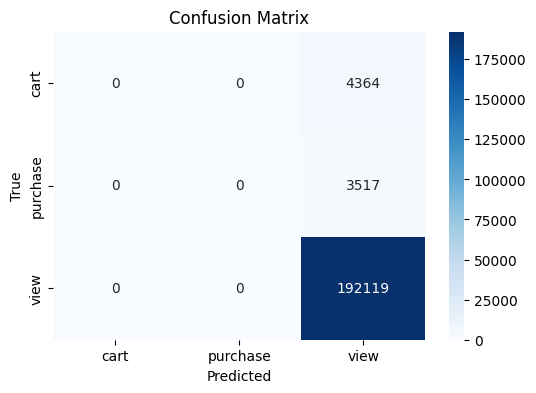

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Get predicted classes for test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#save the model
from tensorflow.keras.models import load_model
model.save('GRU_model.h5')

In [17]:
#load the model
loaded_model = load_model('GRU_model.h5')